<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/EN_Twitter_Sentiment_Analysis_on_any_keyword_here_in_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#English Twitter Sentiment Analysis on any_keyword_here in Malaysia
**Sentiment Analysis**, or **Opinion Mining**, is a sub-field of **Natural Language Processing (NLP)** that tries to identify and extract opinions within a given text. The aim of sentiment analysis is to gauge the attitude, sentiments, evaluations, attitudes and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

**NLTK**, is a suite of libraries and programs for symbolic and statistical natural language processing for English, written in the Python programming language.
https://www.nltk.org/

In [91]:
%pip install GetOldTweets3

In [92]:
%pip install googletrans

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GetOldTweets3 as got
import warnings
from googletrans import Translator

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [551]:
# Change accordingly
keyword = "covid" # use OR or AND respectively, eg. mco OR pkp
location = "Kuala Lumpur, Malaysia"
start_date = "2020-07-22"    # yyyy-mm-dd
#latest_date = "2020-07-25"
#number_tweets = 1000
lang = "en"

In [552]:
# search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
#                                             .setNear(location)\
#                                             .setSince(start_date)\
#                                             .setUntil(latest_date)\
#                                             .setMaxTweets(number_tweets)

In [553]:
# Search tweets using keyword, location, start_date and English language only
search_tweet = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                             .setNear(location)\
                                             .setSince(start_date)\
                                             .setLang(lang)

tweet_df = pd.DataFrame({'got_criteria':got.manager.TweetManager.getTweets(search_tweet)})

In [554]:
print("Number of tweets collected: ")
len(tweet_df)

Number of tweets collected: 


1318

In [555]:
def get_twitter_info():
    tweet_df["username"] = tweet_df["got_criteria"].apply(lambda x: x.username)
    tweet_df["tweet_text"] = tweet_df["got_criteria"].apply(lambda x: x.text)
    tweet_df["date"] = tweet_df["got_criteria"].apply(lambda x: x.date)
    tweet_df["hashtags"] = tweet_df["got_criteria"].apply(lambda x: x.hashtags)
    tweet_df["link"] = tweet_df["got_criteria"].apply(lambda x: x.permalink)

In [556]:
get_twitter_info()
df = tweet_df.drop(["got_criteria"], axis=1)
df

,username,tweet_text,date,hashtags,link
0,OilGasMalaysia,Petronas shuts Turkmenistan HQ amid Covid-19 s...,2020-07-30 07:03:10+00:00,,https://twitter.com/OilGasMalaysia/status/1288...
1,bernamadotcom,Malaysia's success in managing COVID-19 due to...,2020-07-30 07:03:01+00:00,,https://twitter.com/bernamadotcom/status/12887...
2,codebluenews,Police Can Instantly Give Fines Or Simply Warn...,2020-07-30 07:02:07+00:00,,https://twitter.com/codebluenews/status/128873...
3,theSundaily,Malaysia’s success in managing Covid-19 due to...,2020-07-30 07:02:02+00:00,,https://twitter.com/theSundaily/status/1288731...
4,bernamaradio,"#globalbuzz United Nations Secretary-General, ...",2020-07-30 06:54:42+00:00,#globalbuzz,https://twitter.com/bernamaradio/status/128872...
...,...,...,...,...,...
1313,Media_Selangor,Selangor Journal | Airlines need time to fully...,2020-07-22 00:39:04+00:00,,https://twitter.com/Media_Selangor/status/1285...
1314,staronline,"Parliament: Resurgent Covid-19 cases, unity am...",2020-07-22 00:32:14+00:00,,https://twitter.com/staronline/status/12857343...
1315,aidilarazak,"When I checked 19/7 data, I found two import C...",2020-07-22 00:28:25+00:00,,https://twitter.com/aidilarazak/status/1285733...
1316,bernamaradio,#econbuzz United Airlines reported a second qu...,2020-07-22 00:01:43+00:00,#econbuzz #COVID,https://twitter.com/bernamaradio/status/128572...


In [557]:
corpus = df["tweet_text"]
corpus_list = corpus.tolist()

In [558]:
#  Language detection
data = []
for i in corpus_list: 
  t = Translator().detect(i)
  data.append([t.lang, t.confidence, i])
  
detection_df = pd.DataFrame(data)
print(detection_df)

       0         1                                                  2
0     en  1.000000  Petronas shuts Turkmenistan HQ amid Covid-19 s...
1     en  1.000000  Malaysia's success in managing COVID-19 due to...
2     en  1.000000  Police Can Instantly Give Fines Or Simply Warn...
3     en  1.000000  Malaysia’s success in managing Covid-19 due to...
4     en  1.000000  #globalbuzz United Nations Secretary-General, ...
...   ..       ...                                                ...
1313  en  1.000000  Selangor Journal | Airlines need time to fully...
1314  en  1.000000  Parliament: Resurgent Covid-19 cases, unity am...
1315  en  1.000000  When I checked 19/7 data, I found two import C...
1316  en  1.000000  #econbuzz United Airlines reported a second qu...
1317  ms  0.806844  COVID-19: NEW NORM FOR JOURNALIST – A REGIONAL...

[1318 rows x 3 columns]


In [559]:
  detection_df.columns = ['Lang','Confidence','Text']
  s = detection_df.Lang
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  detection_df2 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  detection_df2.head(10)

,Counts,Percentage
en,1267,96.13%
ms,32,2.43%
id,5,0.38%
enms,5,0.38%
idms,2,0.15%
gu,1,0.08%
idhi,1,0.08%
es,1,0.08%
sk,1,0.08%
msen,1,0.08%


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


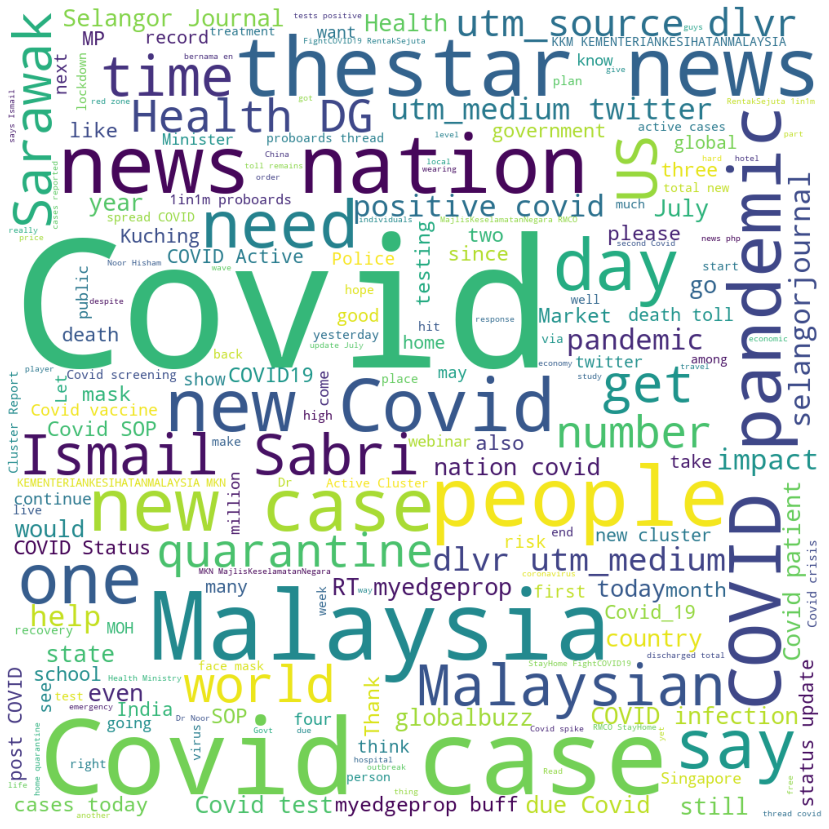

In [560]:
# Word cloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS 

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['igshid', 'http', 'https', 'www', 'instagram', 'amp', 'com', 'ly', 'ow', 'id', 'i\'m']
stopwords.extend(newStopWords)
#stopwords = newStopWords
#stopwords = set(STOPWORDS)


unique_string=(" ").join(corpus_list)
wordcloud = WordCloud(width = 1000, height = 1000, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [561]:
# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
# VADER uses a combination of a sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
# https://github.com/cjhutto/vaderSentiment

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [562]:
model = SentimentIntensityAnalyzer()

In [563]:
# Pie Chart
def cls_corpus_pie(corpus_list):
  data=[]
  for sentence in corpus_list: 
    corpus_result = model.polarity_scores(sentence)
    # Decide whether the text is positive, negative or neutral 
    if corpus_result['compound'] >= 0.05 : 
      cls = "Positive"
    elif corpus_result['compound'] <= -0.05 : 
      cls = "Negative" 
    else : 
      cls = "Neutral" 
    data.append([corpus_result, cls, sentence])
    df = pd.DataFrame(data)

  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Neutral', 'Positive', 'Compound']

  df2['Classification'] = df[1]
  df2['Text'] = df[2]
  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100}).sort_index(ascending=False)
  
  pd.options.display.max_columns = None
  pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  print(df3)
  print("")
  colors=['green', 'yellow', 'red']
  explode = (0.07, 0, 0)
  df3.Counts.plot(kind='pie', explode=explode, colors=colors, autopct='%1.2f%%', shadow=True, startangle=50, fontsize=15)
  plt.title("EN Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15, bbox={'facecolor':'0.8', 'pad':5})
  plt.xlabel('Percentage Distribution of the Sentiments', fontweight='bold', fontsize=15)
  plt.ylabel('')
  plt.show()

      Negative  Neutral  Positive  Compound Classification                                               Text
0        0.000    1.000     0.000    0.0000        Neutral  Petronas shuts Turkmenistan HQ amid Covid-19 s...
1        0.000    0.748     0.252    0.5719       Positive  Malaysia's success in managing COVID-19 due to...
2        0.118    0.848     0.033   -0.5106       Negative  Police Can Instantly Give Fines Or Simply Warn...
3        0.000    0.764     0.236    0.5719       Positive  Malaysia’s success in managing Covid-19 due to...
4        0.000    0.719     0.281    0.8020       Positive  #globalbuzz United Nations Secretary-General, ...
...        ...      ...       ...       ...            ...                                                ...
1313     0.000    1.000     0.000    0.0000        Neutral  Selangor Journal | Airlines need time to fully...
1314     0.000    1.000     0.000    0.0000        Neutral  Parliament: Resurgent Covid-19 cases, unity am...
1315     0

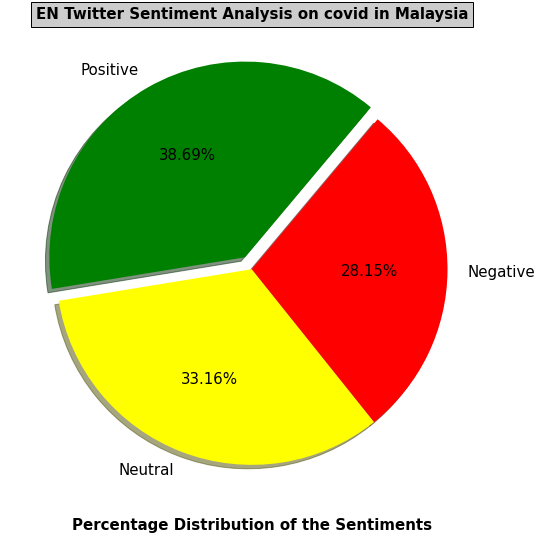

In [564]:
cls_corpus_pie(corpus_list)

In [565]:
# Bar Chart
def cls_corpus(corpus_list):
  data=[]
  for sentence in corpus_list: 
    corpus_result = model.polarity_scores(sentence)
    # Decide whether the text is positive, negative or neutral 
    if corpus_result['compound'] >= 0.05 : 
      cls = "Positive"
    elif corpus_result['compound'] <= -0.05 : 
      cls = "Negative" 
    else : 
      cls = "Neutral" 
    data.append([corpus_result, cls, sentence])
    df = pd.DataFrame(data)

  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Neutral', 'Positive', 'Compound']

  df2['Classification'] = df[1]
  df2['Text'] = df[2]
  class_count  = df2['Classification'].value_counts().sort_index()
  plt.figure(figsize=(20,9))
  #sns.barplot(class_count.index, class_count.values, alpha=0.8)
  ax = class_count.plot.bar(color=['red', 'yellow', 'green'], figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.title("Twitter Sentiment Analysis on {} in Malaysia".format(keyword), fontweight='bold', fontsize=15)
  plt.ylabel('Number of Sentiments', fontweight='bold', fontsize=15)
  plt.xlabel('Classification', fontweight='bold', fontsize=15)
  plt.grid(True)

  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})
  
  i = 0
  #label = np.round(class_count.values, 2)
  label = df3.Percentage
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.01), fontweight='bold', fontsize=15)
      i = i+1

  pd.options.display.max_columns = None
  pd.set_option('display.expand_frame_repr', False)
  print(df2)
  print("")
  print("Total Number of Tweets: ", df2['Classification'].count())
  print("")
  print(df3)
  print("")
  plt.show()

      Negative  Neutral  Positive  Compound Classification                                               Text
0        0.000    1.000     0.000    0.0000        Neutral  Petronas shuts Turkmenistan HQ amid Covid-19 s...
1        0.000    0.748     0.252    0.5719       Positive  Malaysia's success in managing COVID-19 due to...
2        0.118    0.848     0.033   -0.5106       Negative  Police Can Instantly Give Fines Or Simply Warn...
3        0.000    0.764     0.236    0.5719       Positive  Malaysia’s success in managing Covid-19 due to...
4        0.000    0.719     0.281    0.8020       Positive  #globalbuzz United Nations Secretary-General, ...
...        ...      ...       ...       ...            ...                                                ...
1313     0.000    1.000     0.000    0.0000        Neutral  Selangor Journal | Airlines need time to fully...
1314     0.000    1.000     0.000    0.0000        Neutral  Parliament: Resurgent Covid-19 cases, unity am...
1315     0

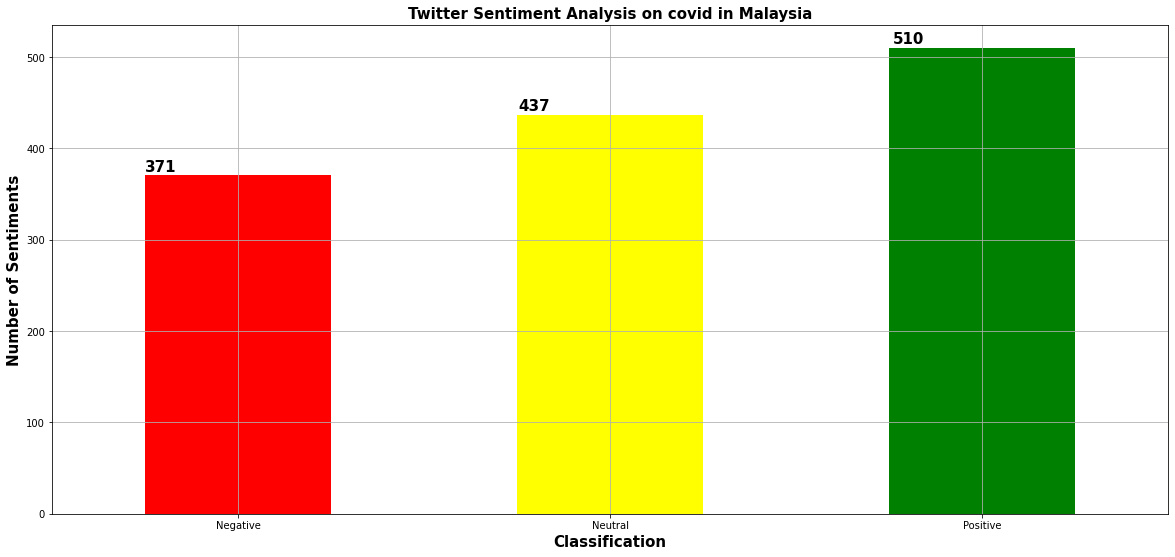

In [566]:
cls_corpus(corpus_list)